In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
import itertools
import re
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.dropna(axis=1,how='all')
df = df.drop_duplicates()

In [4]:
def clear(x):
    return str(x).strip().replace('&nbsp;',' ')
df['品牌'] = df['品牌'].apply(clear)

In [5]:
def clear(x):
    if x.find('-') > 0:
        tmp = x.split('-')
        return float(tmp[1])
    else:
        return float(x)
df['价格'] = df['价格'].apply(clear)

In [6]:
df['收藏人气'].fillna('(0)')
pattern = re.compile(r'\d*')
def clear(x):
    match = pattern.findall(str(x))
    try:
        return int(match[1])
    except:
        return 0
df['收藏人气'] = df['收藏人气'].apply(clear)

In [7]:
df.isnull().sum()

品牌          0
型号          6
颜色          3
系统         12
价格          0
月成交纪录       1
手机类型        5
电池类型        9
核心数         8
电池容量      150
机身款式      966
键盘类型       22
厚度        151
后置摄像头     968
摄像头类型      30
视频显示格式    157
机身内存       11
运行内存        1
尺寸          1
触屏类型        2
分辨率         4
收藏人气        0
dtype: int64

In [8]:
df.drop([ '颜色', '手机类型', '电池类型', '核心数', '电池容量',
         '机身款式', '键盘类型', '厚度', '后置摄像头', '摄像头类型', '视频显示格式', '机身内存', '运行内存',
         '触屏类型', '分辨率',],axis=1,inplace=True)

In [9]:
df.isnull().sum()

品牌        0
型号        6
系统       12
价格        0
月成交纪录     1
尺寸        1
收藏人气      0
dtype: int64

In [10]:
def clear(x):
    return str(x).replace('&nbsp;',' ')
df['型号'] = df['型号'].apply(clear)

In [11]:
df.dropna(axis=0,how='any',inplace=True)

In [12]:
def clear(x):
    return str(x).replace('&nbsp;',' ')
df['系统'] = df['系统'].apply(clear)

In [13]:
tmp = df.groupby('系统').count().sort_values(['品牌',],ascending=False)
tmp.ix[0:7]

,品牌,型号,价格,月成交纪录,尺寸,收藏人气
系统,,,,,,
Android/安卓,1024,1024,1024,1024,1024,1024
无操作系统,316,316,316,316,316,316
阿里巴巴YunOS,32,32,32,32,32,32
FLyme,32,32,32,32,32,32
MIUI,24,24,24,24,24,24
Windows Phone,12,12,12,12,12,12
老人手机,12,12,12,12,12,12


In [14]:
df = df[df.系统.isin(tmp.index[0:7])]

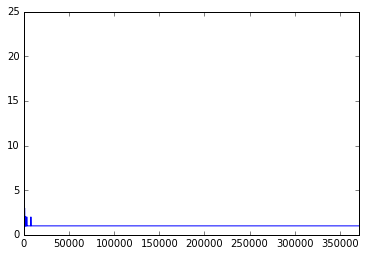

In [15]:
data = df['收藏人气'].value_counts()

data = data.sort_index()

data.plot()